# Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

plt.style.use("seaborn-v0_8-white")
pd.set_option("display.max_columns", 50)

# Data

## Dataset Description
You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

### File descriptions
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

### Data fields
- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category

This dataset is permitted to be used for any purpose, including commercial use.

In [3]:
data_path = "./data/"

sales_train = pd.read_csv(data_path + 'sales_train.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
shops = pd.read_csv(data_path + 'shops.csv')

test = pd.read_csv(data_path + 'test.csv')

print('*' * 30, 'Shape of Data', '*' * 30)
print(f'sales_train : {sales_train.shape}')
print(f'items : {items.shape}')
print(f'item_categories : {item_categories.shape}')
print(f'shops : {shops.shape}')
print(f'test : {test.shape}')

****************************** Shape of Data ******************************
sales_train : (2935849, 6)
items : (22170, 3)
item_categories : (84, 2)
shops : (60, 2)
test : (214200, 3)


In [5]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


## Merge

In [11]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   shop_name           object 
 7   item_name           object 
 8   item_category_id    int64  
 9   item_category_name  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB


In [14]:
train.dtypes

date                   object
date_block_num          int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_day          float64
shop_name              object
item_name              object
item_category_id        int64
item_category_name     object
dtype: object

In [15]:
train.dtypes.reset_index()

,index,0
0,date,object
1,date_block_num,int64
2,shop_id,int64
3,item_id,int64
4,item_price,float64
5,item_cnt_day,float64
6,shop_name,object
7,item_name,object
8,item_category_id,int64
9,item_category_name,object


In [18]:
train.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
shop_name             0
item_name             0
item_category_id      0
item_category_name    0
dtype: int64

In [19]:
def resumetable(df):
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입'])
    summary = summary.reset_index().rename(columns={'index':'피쳐'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫번째 값'] = df.iloc[0].values
    summary['두번째 값'] = df.iloc[1].values
    return summary


summary = resumetable(train)
summary

,피쳐,데이터타입,결측값 개수,고유값 개수,첫번째 값,두번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


# Viz

[item_cnt_day 이상치 분석 결과]
- IQR: 0.00 (Q1: 1.00, Q3: 1.00)
- 허용 범위: 1.00 ~ 1.00
- 이상치 개수: 306,477개 / 전체 2,935,849개
- 이상치 비율: 10.44%


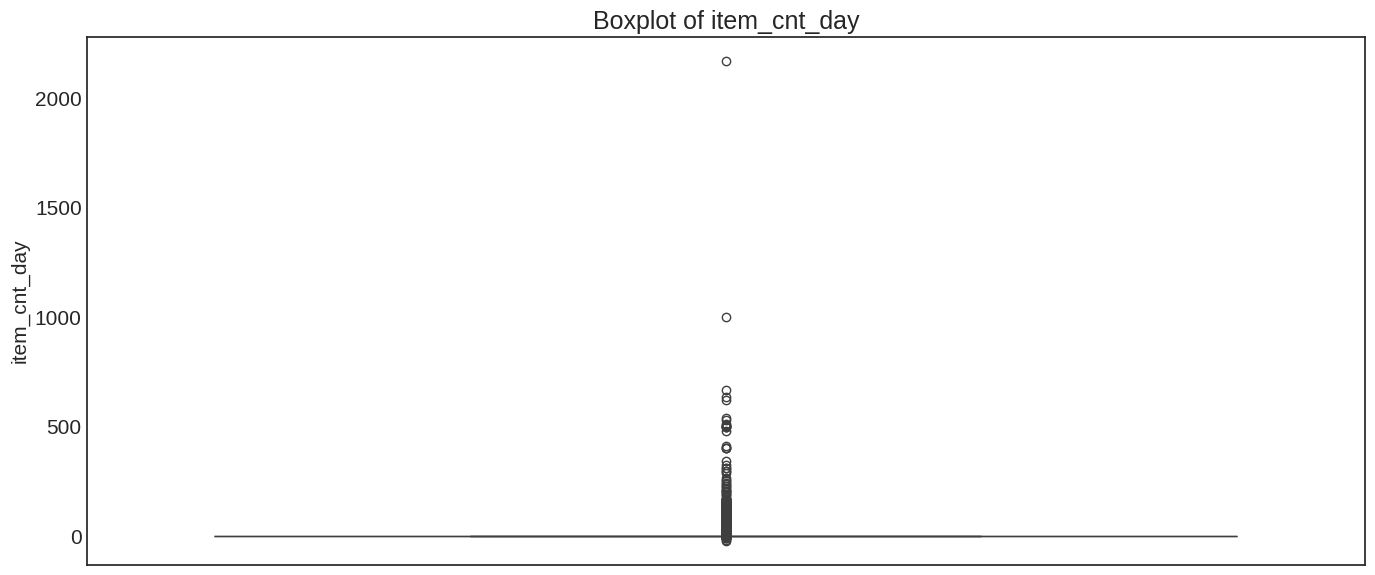

In [39]:
def analyze_and_plot_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    normal = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    outlier_count = len(outliers)
    total_count = len(df)
    outlier_ratio = outlier_count / total_count * 100
    
    print(f"[{column} 이상치 분석 결과]")
    print(f"- IQR: {iqr:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})")
    print(f"- 허용 범위: {lower_bound:.2f} ~ {upper_bound:.2f}")
    print(f"- 이상치 개수: {outlier_count:,}개 / 전체 {total_count:,}개")
    print(f"- 이상치 비율: {outlier_ratio:.2f}%")

    fig, axes = plt.subplots(figsize=(14, 6))
    sns.boxplot(y=column, data=df, ax=axes)
    axes.set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

# 함수 실행
analyze_and_plot_outliers(train, 'item_cnt_day')

- 대부분의 일일 판매량이 500개 이하이고, 1000개 이상의 판매량을 보이는 데이터가 극소수 존재
- IQR에 따라 이상치 비율을 확인하면 전체 데이터의 10% 정도가 이상치로 판단됨

[item_price 이상치 분석 결과]
- IQR: 750.00 (Q1: 249.00, Q3: 999.00)
- 허용 범위: -876.00 ~ 2124.00
- 이상치 개수: 258,942개 / 전체 2,935,849개
- 이상치 비율: 8.82%


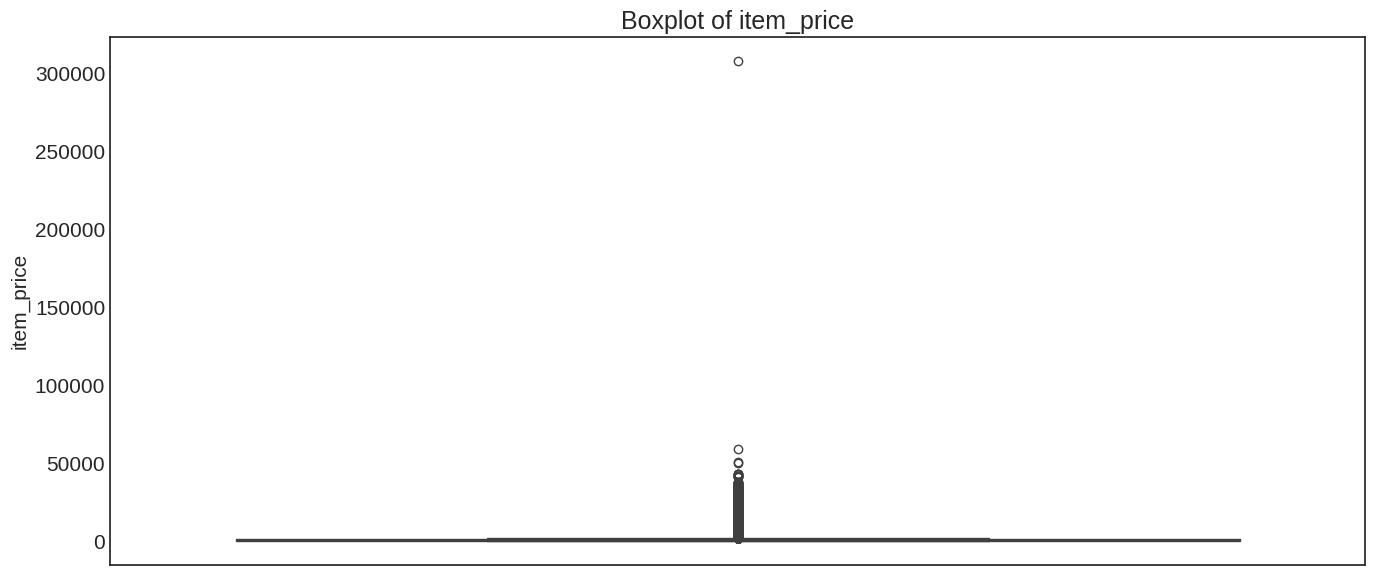

In [40]:
analyze_and_plot_outliers(train, 'item_price')

In [43]:
month_group = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'})
month_group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


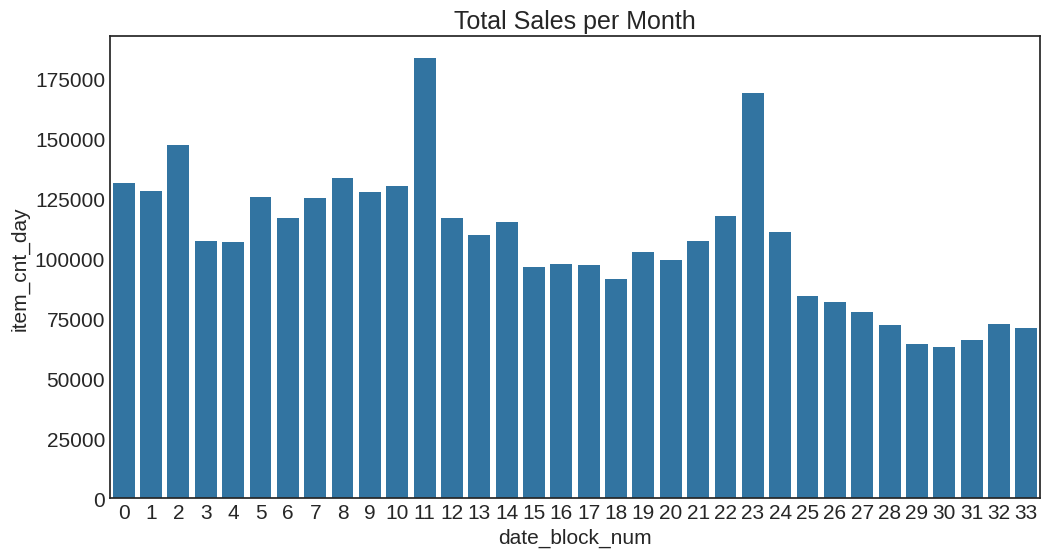

In [ ]:
mpl.rc('font', size=15)
fig, ax = plt.subplots(figsize=(12, 6))

month_group = month_group.reset_index()
sns.barplot(data=month_group, x='date_block_num', y='item_cnt_day')
ax.set_title('Total Sales per Month')
plt.show()

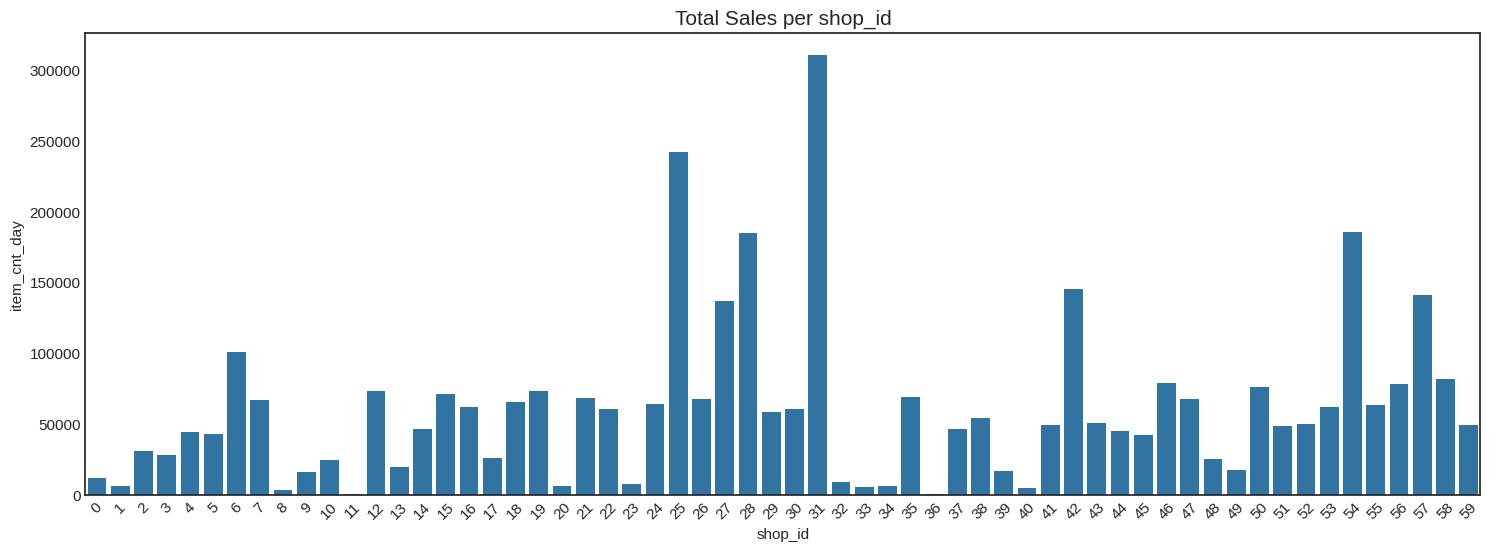

In [59]:
def plot_group_sales(df, column):
    group = df.groupby(column).agg({'item_cnt_day': 'sum'})
    group.reset_index()

    mpl.rc('font', size=11)
    fig, ax = plt.subplots(figsize=(18, 6))

    group = group.reset_index()
    sns.barplot(data=group, x=column, y='item_cnt_day')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title('Total Sales per ' + column, size=15)
    plt.show()
    
plot_group_sales(train, 'shop_id')

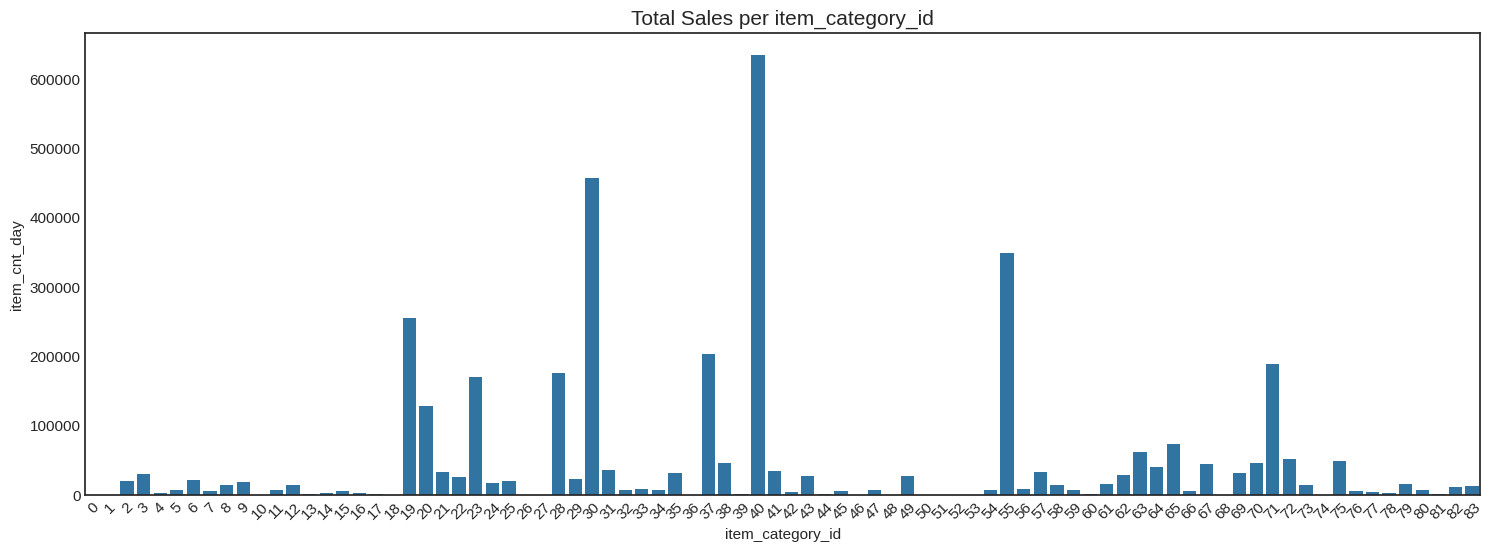

In [61]:
   plot_group_sales(train, 'item_category_id')

- 판매점, 상품 분류에 따라 판매량 차이가 크게 나타남